### 1.0 Import the datasets and libraries, check datatype, statistical summary,shape,null values or incorrect imputation

In [204]:
# Handle/Filter warnings
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, confusion_matrix, recall_score, precision_score, accuracy_score, roc_auc_score, roc_curve

In [205]:
# Import/Load dataset
df = pd.read_csv('Bank_Personal_Loan_Modelling.csv')

In [206]:
# Visualize the structure of the data
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [207]:
# Drop ID 
df.drop('ID', axis=1, inplace=True)

In [208]:
# Convert education to categorical, 1: Undergrad; 2: Graduate;3:  Advanced/Professional
df.Education.replace({ 1: 'Undergrad', 2: 'Graduate', 3: 'Advanced/Professional' }, inplace=True)
df.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,91107,4,1.6,Undergrad,0,0,1,0,0,0
1,45,19,34,90089,3,1.5,Undergrad,0,0,1,0,0,0
2,39,15,11,94720,1,1.0,Undergrad,0,0,0,0,0,0
3,35,9,100,94112,1,2.7,Graduate,0,0,0,0,0,0
4,35,8,45,91330,4,1.0,Graduate,0,0,0,0,0,1


In [209]:
# Convert Personal Loan to categorical, 0: No; 1: Yes
df['Personal Loan'].replace({ 0: 'No', 1: 'Yes' }, inplace=True)
df.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,91107,4,1.6,Undergrad,0,No,1,0,0,0
1,45,19,34,90089,3,1.5,Undergrad,0,No,1,0,0,0
2,39,15,11,94720,1,1.0,Undergrad,0,No,0,0,0,0
3,35,9,100,94112,1,2.7,Graduate,0,No,0,0,0,0
4,35,8,45,91330,4,1.0,Graduate,0,No,0,0,0,1


In [210]:
# Convert Securities Account to categorical, 0: No; 1: Yes
df['Securities Account'].replace({ 0: 'No', 1: 'Yes' }, inplace=True)
df.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,91107,4,1.6,Undergrad,0,No,Yes,0,0,0
1,45,19,34,90089,3,1.5,Undergrad,0,No,Yes,0,0,0
2,39,15,11,94720,1,1.0,Undergrad,0,No,No,0,0,0
3,35,9,100,94112,1,2.7,Graduate,0,No,No,0,0,0
4,35,8,45,91330,4,1.0,Graduate,0,No,No,0,0,1


In [211]:
# Convert CD Account to categorical, 0: No; 1: Yes
df['CD Account'].replace({ 0: 'No', 1: 'Yes' }, inplace=True)
df.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,91107,4,1.6,Undergrad,0,No,Yes,No,0,0
1,45,19,34,90089,3,1.5,Undergrad,0,No,Yes,No,0,0
2,39,15,11,94720,1,1.0,Undergrad,0,No,No,No,0,0
3,35,9,100,94112,1,2.7,Graduate,0,No,No,No,0,0
4,35,8,45,91330,4,1.0,Graduate,0,No,No,No,0,1


In [212]:
# Convert Online to categorical, 0: No; 1: Yes
df['Online'].replace({ 0: 'No', 1: 'Yes' }, inplace=True)
df.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,91107,4,1.6,Undergrad,0,No,Yes,No,No,0
1,45,19,34,90089,3,1.5,Undergrad,0,No,Yes,No,No,0
2,39,15,11,94720,1,1.0,Undergrad,0,No,No,No,No,0
3,35,9,100,94112,1,2.7,Graduate,0,No,No,No,No,0
4,35,8,45,91330,4,1.0,Graduate,0,No,No,No,No,1


In [213]:
# Convert CreditCard to categorical, 0: No; 1: Yes
df['CreditCard'].replace({ 0: 'No', 1: 'Yes' }, inplace=True)
df.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,91107,4,1.6,Undergrad,0,No,Yes,No,No,No
1,45,19,34,90089,3,1.5,Undergrad,0,No,Yes,No,No,No
2,39,15,11,94720,1,1.0,Undergrad,0,No,No,No,No,No
3,35,9,100,94112,1,2.7,Graduate,0,No,No,No,No,No
4,35,8,45,91330,4,1.0,Graduate,0,No,No,No,No,Yes


In [214]:
# Check datatype
df.dtypes

Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education              object
Mortgage                int64
Personal Loan          object
Securities Account     object
CD Account             object
Online                 object
CreditCard             object
dtype: object

In [215]:
# Inspect shape of data
df.shape

(5000, 13)

In [216]:
# Check for null values
# seems like there are no null values
df.isnull().any()

Age                   False
Experience            False
Income                False
ZIP Code              False
Family                False
CCAvg                 False
Education             False
Mortgage              False
Personal Loan         False
Securities Account    False
CD Account            False
Online                False
CreditCard            False
dtype: bool

In [217]:
# Statiscal summary
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.0,20.0,30.0,43.0
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.0,93437.0,94608.0,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.0,2.0,3.0,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.7,1.5,2.5,10.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0


### 2.0 EDA:  Study  the  data  distribution  in  each  attribute  and  target  variable,  share  your  findings

In [218]:
# Number of unique in each column
df.nunique()

Age                    45
Experience             47
Income                162
ZIP Code              467
Family                  4
CCAvg                 108
Education               3
Mortgage              347
Personal Loan           2
Securities Account      2
CD Account              2
Online                  2
CreditCard              2
dtype: int64

In [219]:
# Number of people with zero mortgage
df[df.Mortgage == 0].Mortgage.count()

3462

In [220]:
# Number of people with zero credit card spending per month
df[df.CCAvg == 0].CCAvg.count()

106

In [221]:
# Value counts of all categorical columns

for index, value in enumerate(df.columns):
    if (df.dtypes[index] == 'object'):
        print 'Value counts for', value
        print df[value].value_counts()
        print '\n\n'

Value counts for Education
Undergrad                2096
Advanced/Professional    1501
Graduate                 1403
Name: Education, dtype: int64



Value counts for Personal Loan
No     4520
Yes     480
Name: Personal Loan, dtype: int64



Value counts for Securities Account
No     4478
Yes     522
Name: Securities Account, dtype: int64



Value counts for CD Account
No     4698
Yes     302
Name: CD Account, dtype: int64



Value counts for Online
Yes    2984
No     2016
Name: Online, dtype: int64



Value counts for CreditCard
No     3530
Yes    1470
Name: CreditCard, dtype: int64





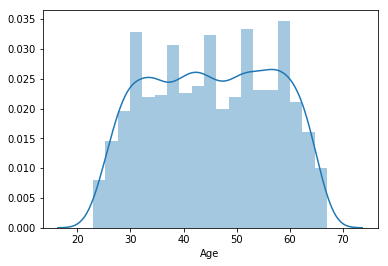

In [222]:
# Univariate plots
# Univariate plot for Age
sns.distplot(df['Age'], kde=True)

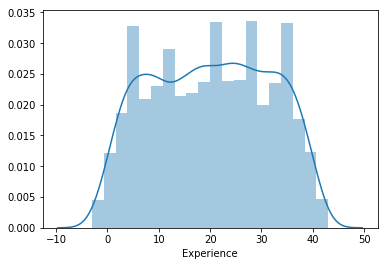

In [223]:
# Univariate plot for Age
sns.distplot(df['Experience'], kde=True)

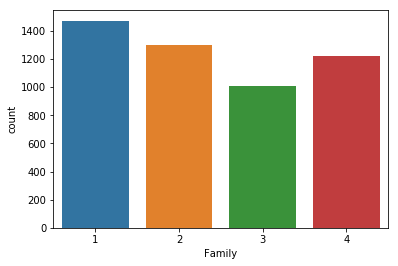

In [224]:
# Univariate plot for Family
sns.countplot(x='Family', data=df)

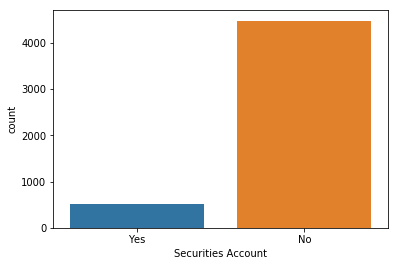

In [225]:
# Univariate plot for Family
sns.countplot(x='Securities Account', data=df)

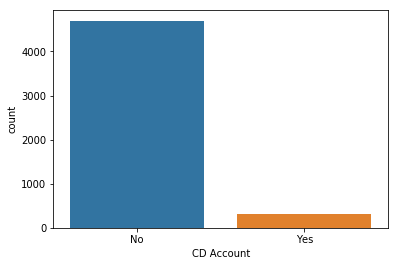

In [226]:
# Univariate plot for CD Account
sns.countplot(x='CD Account', data=df)

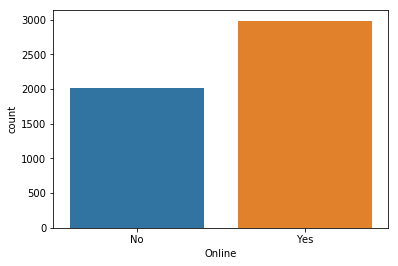

In [227]:
# Univariate plot for Online
sns.countplot(x='Online', data=df)

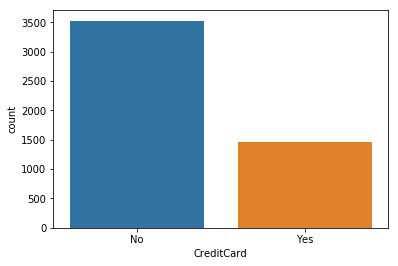

In [228]:
# Univariate plot for CreditCard
sns.countplot(x='CreditCard', data=df)

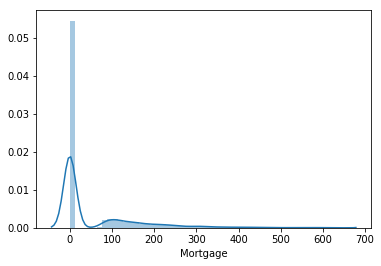

In [229]:
# Univariate plot for Age
sns.distplot(df['Mortgage'], kde=True)

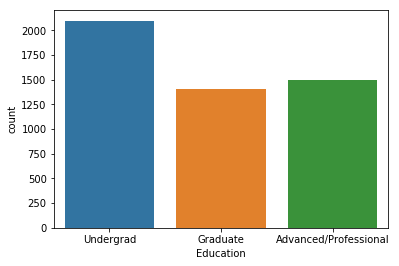

In [230]:
# Univariate plot for Education
sns.countplot(x='Education', data=df)

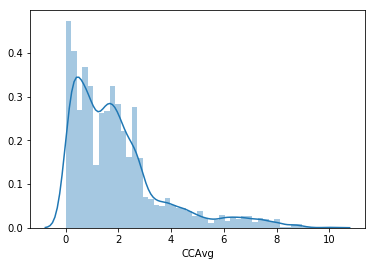

In [231]:
# Univariate plot for Age
sns.distplot(df['CCAvg'], kde=True)

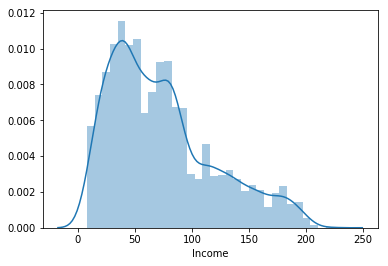

In [232]:
# Univariate plot for Age
sns.distplot(df['Income'], kde=True)

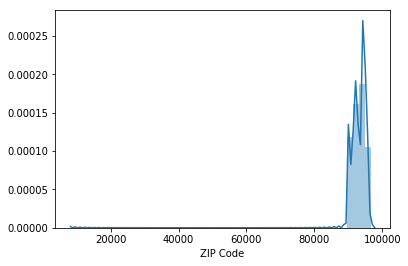

In [233]:
# Univariate plot for Age
sns.distplot(df['ZIP Code'], kde=True)

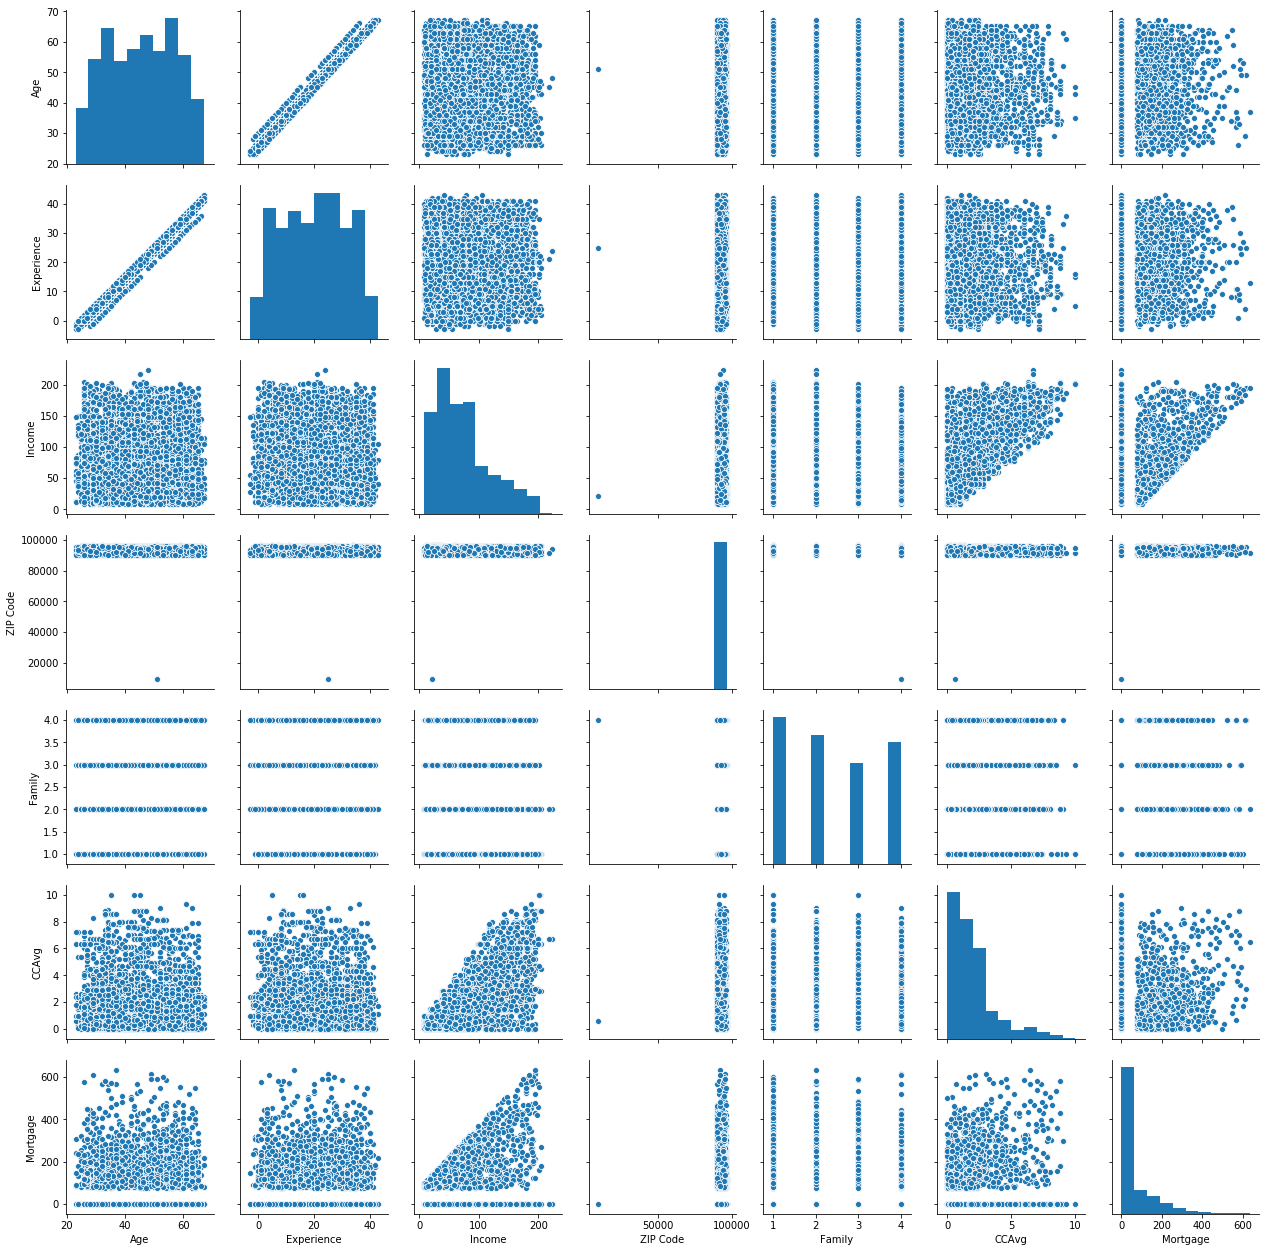

In [234]:
# Bivariate Analysis
sns.pairplot(df)

In [235]:
# Get data model ready
x = df.drop('Personal Loan', axis=1)
y = df[['Personal Loan']]

In [236]:
# Convert categorical vriables to dummy variables
x = pd.get_dummies(x, drop_first=True)
y = y.replace({'No': 0, 'Yes': 1})

### 3.0 Split the data into training and testset in the ratio of 70:30 respectively

In [237]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1, test_size=0.3)

### 4.0 Use  Logistic  Regression model  to  predict whether the customer will  take  personal  loan  or not. Print all the metrics related for evaluating the model performance 

In [238]:
model = LogisticRegression(solver="liblinear")
model.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [239]:
y_predict = model.predict(x_test)

In [240]:
## function to get confusion matrix in a proper format
def draw_cm( actual, predicted ):
    cm = confusion_matrix( actual, predicted)
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = [0,1] , yticklabels = [0,1] )
    plt.ylabel('Observed')
    plt.xlabel('Predicted')
    plt.show()

Trainig accuracy 0.9088571428571428

Testing accuracy 0.9073333333333333

Confusion Matrix


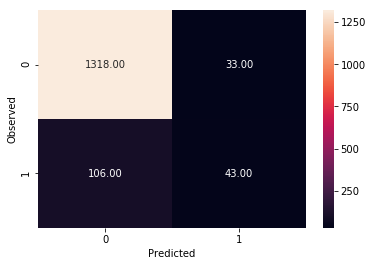

None

Recall: 0.28859060402684567

Precision: 0.5657894736842105

F1 Score: 0.38222222222222224

Roc Auc Score: 0.632082126587812


In [241]:
print "Trainig accuracy",model.score(x_train,y_train)
print
print "Testing accuracy",model.score(x_test, y_test)
print
print 'Confusion Matrix'
print draw_cm(y_test,y_predict)
print
print "Recall:",recall_score(y_test,y_predict)
print
print "Precision:",precision_score(y_test,y_predict)
print
print "F1 Score:",f1_score(y_test,y_predict)
print
print "Roc Auc Score:",roc_auc_score(y_test,y_predict)

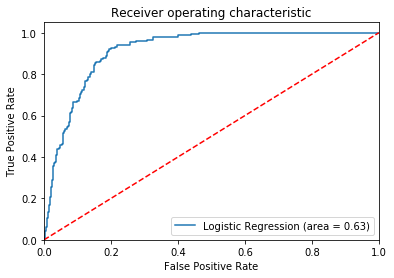

In [244]:
logit_roc_auc = roc_auc_score(y_test, model.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()